# Problem Statement
    
    Perform a segmentation study on the dataset to display useful information using any
    visualization library.

# Prepare notebook

In [139]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score 

# EDA

## Load Data

In [140]:
# data path
%ls -l data/au_train.csv

-rwxrwxrwx 1 1000 1000 3844216 Sep 27 15:03 data/au_train.csv*


In [141]:
from pandas import read_csv
filename1 = 'data/au_train.csv'
filename2 = 'data/au_test.csv'

train_set = read_csv(filename1)
test_set  = read_csv(filename2) 
train_set.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [142]:
train_set.info()
print ()
print ('train size:', train_set.shape)
print ('test size:', test_set.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

train size: (32561, 15)
test size: (16281, 15)


In [143]:
print(train_set.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


In [144]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
class             16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


There are no missing values in the train data set. Data consists of 8 categorical variables, one target which is also non numeric and 6 numerical features.

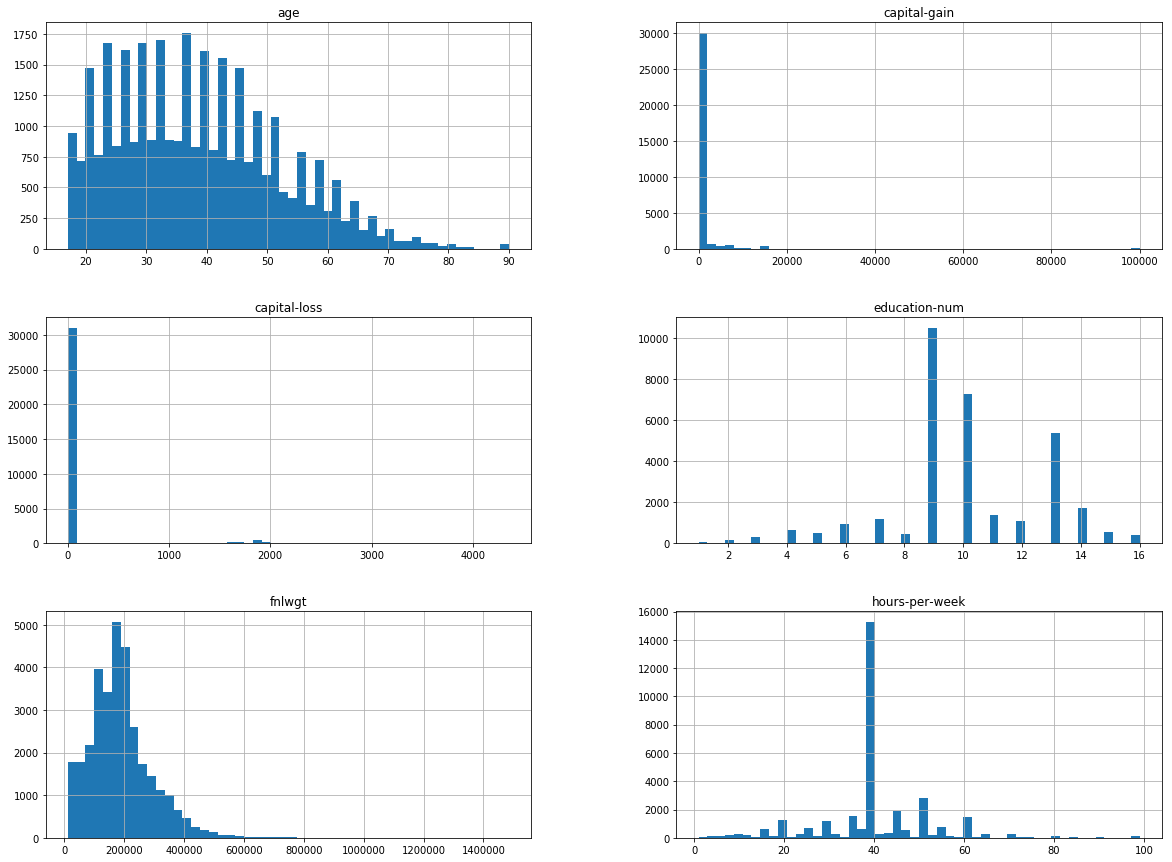

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [146]:
print ('train size:', train_set.shape)
print ('test size:', test_set.shape)

train size: (32561, 15)
test size: (16281, 15)


In [147]:
train_set.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [148]:
train_set.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [149]:
test_set.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


## Data Exploration

In [150]:
# transform column names for easy manipulation

train_set=train_set.rename(columns={'education-num':'education_num', 'marital-status': 'marital_status',
                          'capital-gain':'capital_gain', 'capital-loss':'capital_loss',
                  'hours-per-week':'hrs_per_week', 'native-country':'native_country'})
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [151]:
test_set= test_set.rename(columns={'education-num':'education_num', 'marital-status': 'marital_status',
                          'capital-gain':'capital_gain', 'capital-loss':'capital_loss',
                  'hours-per-week':'hrs_per_week', 'native-country':'native_country'})

In [152]:
test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


##  Check Correlation among numeric variables

In [132]:
# unique values of target variable
train_set['class'].unique()


array([' <=50K', ' >50K'], dtype=object)

In [133]:
# change class into numeric type before checking correlations

train_set['class'] = train_set["class"].map({ ' <=50K': 0, ' >50K': 1})

In [134]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


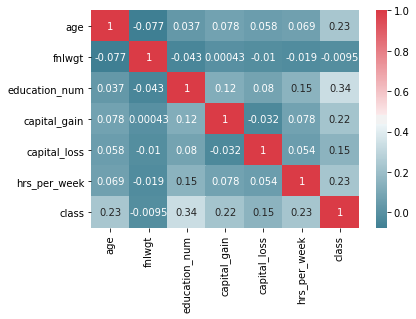

In [135]:
corr = train_set[train_set.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot = True)

This correlation plot shows that education_num is highly correlated with class. Similarly, capital_gain, age and hours_per_week have pretty high correlation with class.

In [137]:
train_set.class.value_counts()

SyntaxError: invalid syntax (<ipython-input-137-0591ef8d7a7f>, line 1)

In [117]:
test_set.class.value_counts()

SyntaxError: invalid syntax (<ipython-input-117-1358336ced4a>, line 1)

## Some Plots

Text(0,0.5,'Frequency')

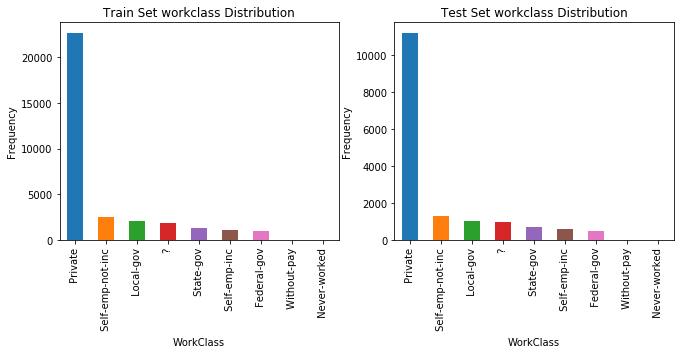

In [77]:
# distribution workclass categories in train and tes data
# this also shows unique values for each categorical feature in the data set

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train Set workclass Distribution')
pd.value_counts(train_set['workclass']).plot.bar()
plt.xlabel('WorkClass')
plt.ylabel('Frequency')

plt.subplot(122)
plt.title('Test Set workclass Distribution')
pd.value_counts(test_set['workclass']).plot.bar()   
plt.xlabel('WorkClass')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

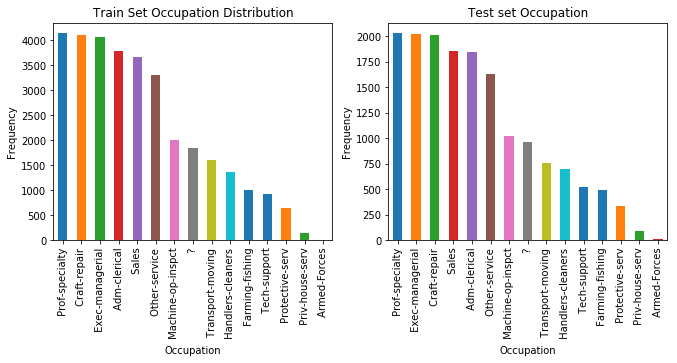

In [78]:
# distribution ooccupation categories in train and test data
plt.figure(figsize=(11,4))
plt.subplot(121)

plt.title('Train Set Occupation Distribution')
pd.value_counts(train_set['occupation']).plot.bar()
plt.xlabel('Occupation')
plt.ylabel('Frequency')

plt.subplot(122)
plt.title('Test set Occupation')
pd.value_counts(test_set['occupation']).plot.bar()
plt.xlabel('Occupation')
plt.ylabel('Frequency')

In [79]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Text(0,0.5,'Frequency')

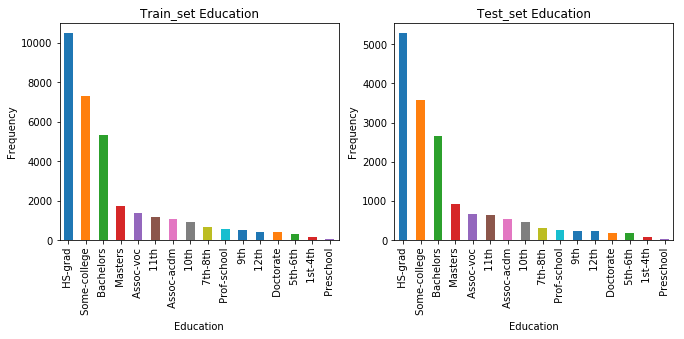

In [80]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train_set Education')
pd.value_counts(train_set['education']).plot.bar()
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.subplot(122)
plt.title('Test_set Education')
pd.value_counts(test_set['education']).plot.bar()
plt.xlabel('Education')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

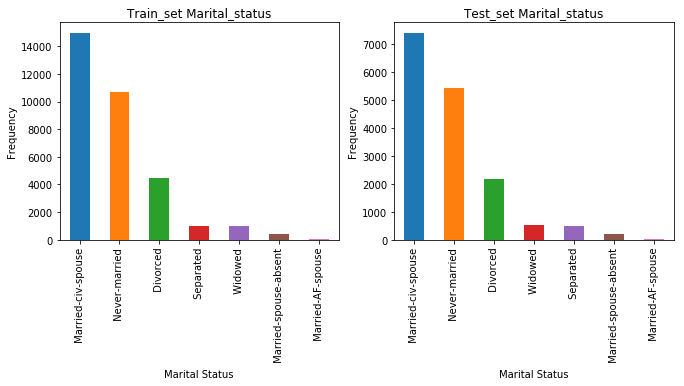

In [81]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train_set Marital_status')
pd.value_counts(train_set['marital_status']).plot.bar()
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.subplot(122)
plt.title('Test_set Marital_status')
pd.value_counts(test_set['marital_status']).plot.bar()
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

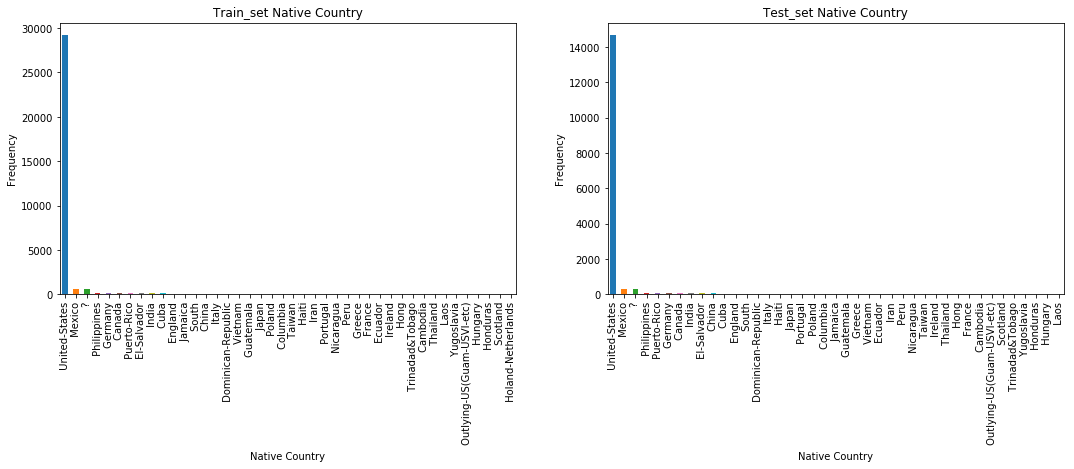

In [82]:
# distribution native country categories in train and tes data
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.title('Train_set Native Country')
pd.value_counts(train_set['native_country']).plot.bar()
plt.xlabel('Native Country')
plt.ylabel('Frequency')

plt.subplot(122)
plt.title('Test_set Native Country')
pd.value_counts(test_set['native_country']).plot.bar()
plt.xlabel('Native Country')
plt.ylabel('Frequency')

In [83]:
train_set.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [84]:
test_set.native_country.value_counts()

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Japan                            30
 Portugal                         30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Peru                             15
 

These plot show feature Native_country in test set does not have Holand_Netherlands category which is present in Train set

In [85]:
# To find how many rows there are where native_country is Holand-Netherlands
# (this is done in order to avoid any discrepancy between train and test set with respect to number of columns)

print(train_set.loc[train_set['native_country']==' Holand-Netherlands'])

       age workclass  fnlwgt      education  education_num  marital_status  \
19609   32   Private   27882   Some-college             10   Never-married   

               occupation     relationship    race      sex  capital_gain  \
19609   Machine-op-inspct   Other-relative   White   Female             0   

       capital_loss  hrs_per_week       native_country  class  
19609          2205            40   Holand-Netherlands      0  


So there is only one row in the train set where native_country is Holand- Netherlands. This can be deleted since this category isnot present in test set. This will help even out number of columns while creating dummies

In [86]:
train_set= train_set.drop([19609], axis =0)
#print(train_set.loc[train_set['native-country']==' Holand-Netherlands'])
train_set.shape

(32560, 15)

Text(0,0.5,'Frequency')

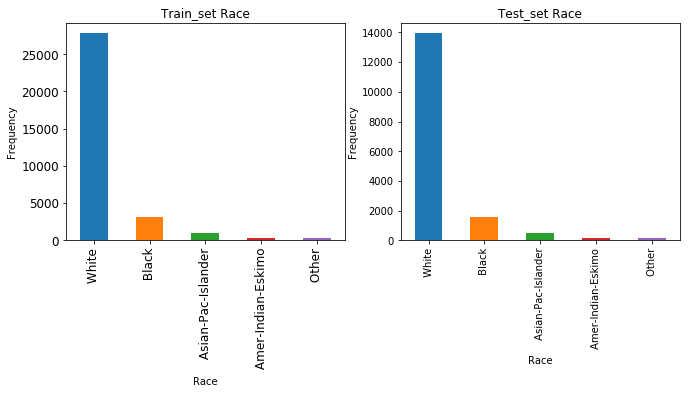

In [87]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train_set Race')
pd.value_counts(train_set['race']).plot.bar(fontsize=12)
plt.xlabel('Race')
plt.ylabel('Frequency')

plt.subplot(122)
plt.title('Test_set Race')
pd.value_counts(test_set['race']).plot.bar()
plt.xlabel('Race')
plt.ylabel('Frequency')

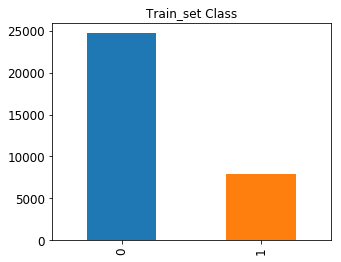

In [88]:
# class distribution in train set

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train_set Class')
pd.value_counts(train_set['class']).plot.bar(fontsize= 12)

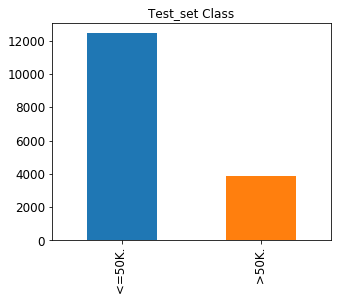

In [156]:
# class distribution in test set

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Test_set Class')
pd.value_counts(test_set['class']).plot.bar(fontsize= 12)

distribution of target variable 'class' in train set is uneven for both train and test set, meaning class <=50K consists of above 70 percent while class >50K is about 30 percent.

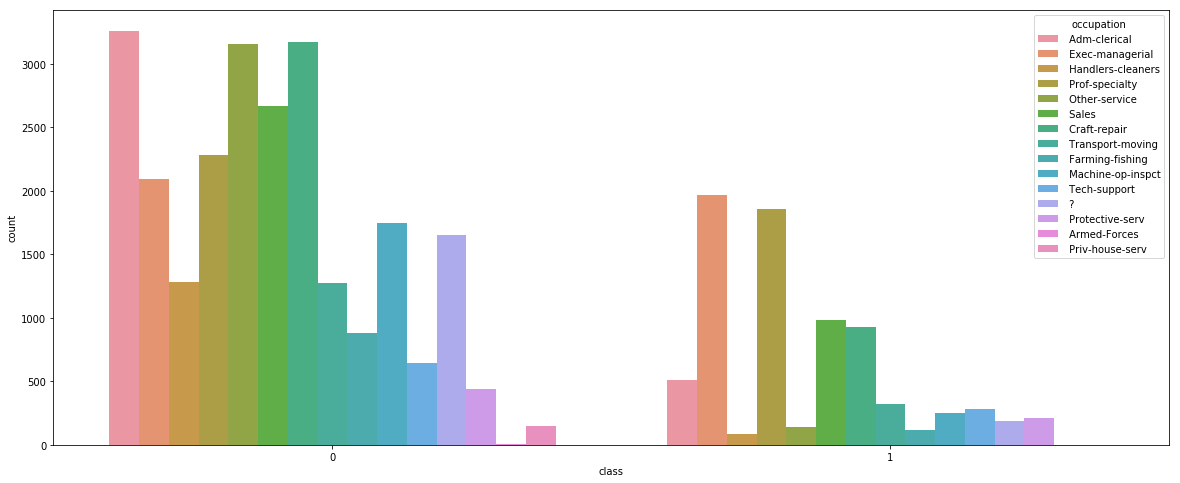

In [89]:

plt.figure(figsize=(20, 8))
ax = sns.countplot(x="class", hue="occupation", data=train_set)

<Figure size 1080x1440 with 0 Axes>

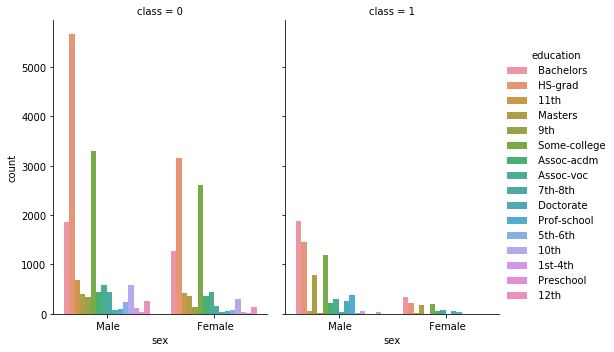

In [90]:
plt.figure(figsize=(15, 20))
g =sns.catplot(x='sex', hue='education', col= 'class',
               data= train_set, kind='count',
               aspect =.7)

## Data Cleaning

    Three columns in the Datasets have '?' character. This is being taken care by first replacing this string with nan which in turn is being replaced by mode value of each feature in the data. 

In [91]:

datasets=[train_set, test_set] 

cats=["workclass",'occupation', "native_country"] # separate columns with '?' string

for data in datasets:
    for i in data.columns:
        data[i].replace(' ?', np.nan, inplace=True) # replace '?' with nan

p = test_set.filter(["workclass",'occupation', "native_country"]).mode() 

test_set[cats]=test_set[cats].fillna(value=p.iloc[0]) # replace nan with mode of each column


In [92]:
# performing above process in train_set

l = train_set.filter(['workclass','occupation', 'native_country']).mode()
train_set[cats]=train_set[cats].fillna(value=p.iloc[0])

In [93]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.


# Data preparation for machine learning

## Feature Transformation and Feature Engineering

Since the native_country in the data is mostly  United States, following transformation is being done

In [94]:
train_set['native_country']= train_set['native_country'].replace(to_replace=[' Philippines',' Puerto-Rico',' Canada',' Germany',' India',' Cambodia',' Ecuador',
                                                                   ' England', ' Jamaica',' China',' Hong',' El-Salvador',' Cuba',' Dominican-Republic',' Vietnam',
                                                                  ' South',' Japan',' Italy',' Haiti',' Poland',' Portugal',' Columbia',' Iran',' Taiwan',' Guatemala',
                                                                  ' Nicaragua',' Peru',' Greece',' France',' Ireland',' Trinadad&Tobago',' Scotland',' Laos',' Thailand',
                                                                  ' Hungary',' Yugoslavia',' Outlying-US(Guam-USVI-etc)',' Honduras'], value='Others')

test_set['native_country']= test_set['native_country'].replace(to_replace=[' Philippines',' Puerto-Rico',' Canada',' Germany',' India',' Cambodia',' Ecuador',
                                                                   ' England', ' Jamaica',' China',' Hong',' El-Salvador',' Cuba',' Dominican-Republic',' Vietnam',
                                                                  ' South',' Japan',' Italy',' Haiti',' Poland',' Portugal',' Columbia',' Iran',' Taiwan',' Guatemala',
                                                                  ' Nicaragua',' Peru',' Greece',' France',' Ireland',' Trinadad&Tobago',' Scotland',' Laos',' Thailand',
                                                                  ' Hungary',' Yugoslavia',' Outlying-US(Guam-USVI-etc)',' Honduras'], value='Others')



In [95]:
train_set['native_country'].unique()

array([' United-States', 'Others', ' Mexico'], dtype=object)

In order to reduce some of the categories of categorical features, some of the categories can be combined without changing their representation

In [96]:
train_set.workclass.value_counts()

 Private             24531
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [97]:
# reducing 'workclass' categories

train_set['workclass']=train_set['workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'], 'self_emp') 
train_set['workclass']=train_set['workclass'].replace([ ' Local-gov', ' State-gov', ' Federal-gov'],'gov')
train_set['workclass']=train_set['workclass'].replace([' Without-pay',' Never-worked'],'Other')

test_set['workclass']=test_set['workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'], 'self_emp') 
test_set['workclass']=test_set['workclass'].replace([ ' Local-gov', ' State-gov', ' Federal-gov'],'gov')
test_set['workclass']=test_set['workclass'].replace([' Without-pay',' Never-worked'],'Other')

In [98]:
print(train_set['workclass'].unique(), train_set['workclass'].unique())

['gov' 'self_emp' ' Private' 'Other'] ['gov' 'self_emp' ' Private' 'Other']


In [99]:
test_set['workclass'].unique()

array([' Private', 'gov', 'self_emp', 'Other'], dtype=object)

In [100]:
print(train_set.race.value_counts(), '', test_set.race.value_counts() )


 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64   White                 13946
 Black                  1561
 Asian-Pac-Islander      480
 Amer-Indian-Eskimo      159
 Other                   135
Name: race, dtype: int64


In [101]:
## Transform feature 'race'

train_set['race']= train_set['race'].replace([' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'], 'Other')

test_set['race']= test_set['race'].replace([' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'], 'Other')

In [102]:
train_set.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [103]:
# Transforming 'marital-status'
train_set['marital_status']= train_set['marital_status'].replace([' Never-married',' Divorced',' Separated', 
                                                                  ' Widowed',' Married-spouse-absent',
                                                                  ' Married-AF-spouse'], 'Single')

test_set['marital_status']= test_set['marital_status'].replace([' Never-married',' Divorced',' Separated', 
                                                                  ' Widowed',' Married-spouse-absent',
                                                                  ' Married-AF-spouse'], 'Single')

In [104]:
train_set['marital_status'].unique()

array(['Single', ' Married-civ-spouse'], dtype=object)

In [105]:
test_set['marital_status'].unique()

array(['Single', ' Married-civ-spouse'], dtype=object)

In [106]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,39,gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,self_emp,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
